In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/insaurance.csv")

# print("Shape: ",df.shape)
# print("First rows: ",df.head())
# print("Data types: ",df.info())
print("Summary Analysis",df.describe())
print("Missing Values: ",df.isnull().sum())
print("Column Names: ",df.columns)

Summary Analysis                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Missing Values:  age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Column Names:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


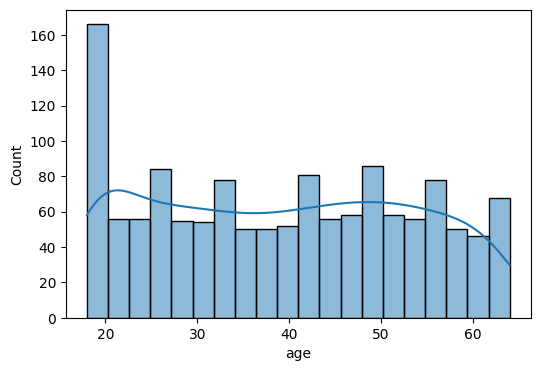

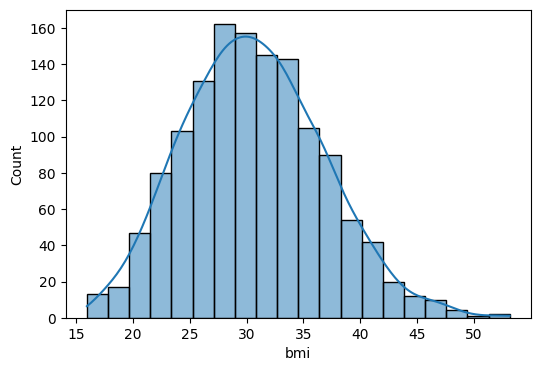

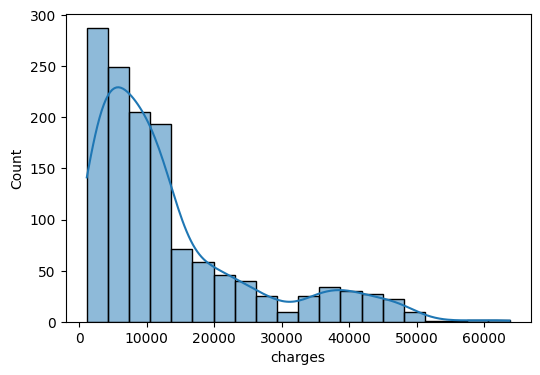

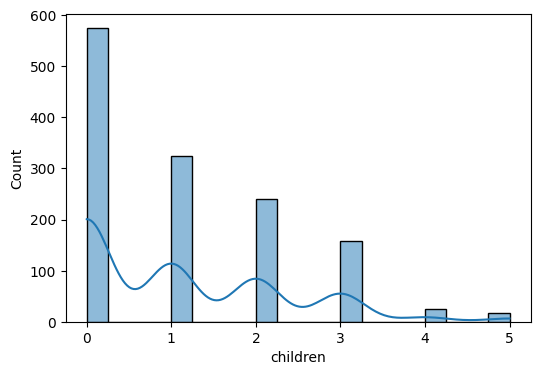

In [31]:
features = ["age","bmi","charges","children"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)

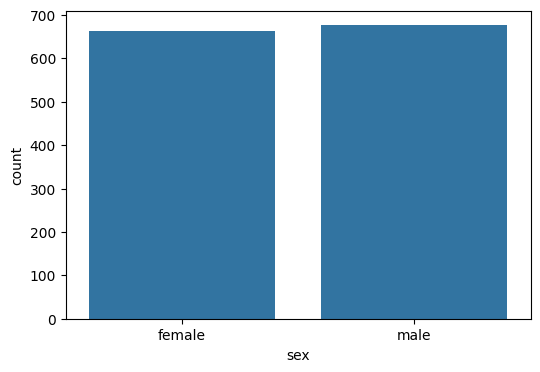

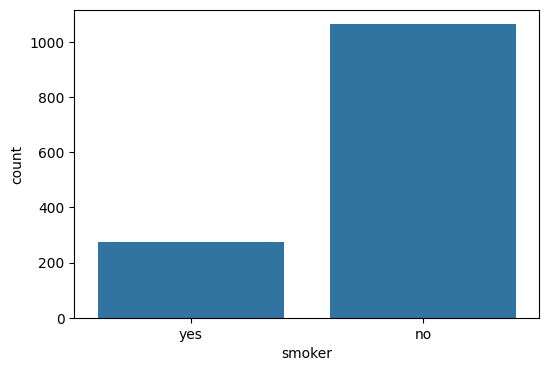

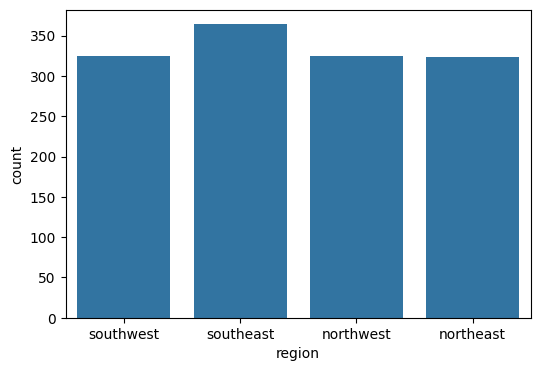

In [32]:
cat_features = ["sex","smoker","region"]
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])

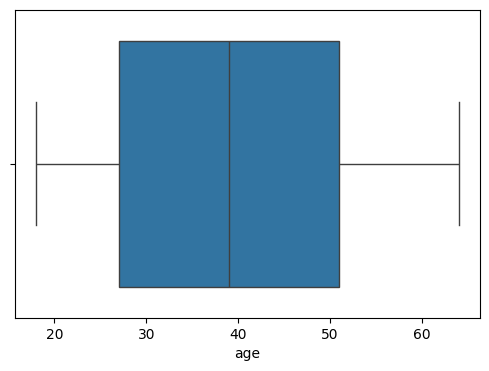

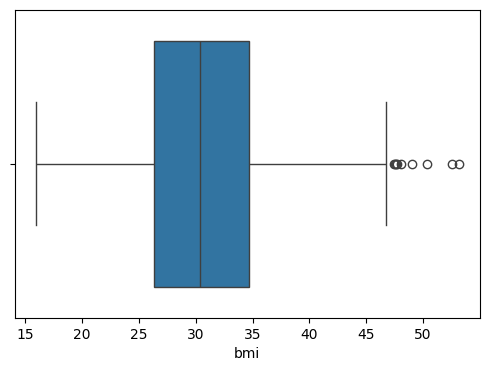

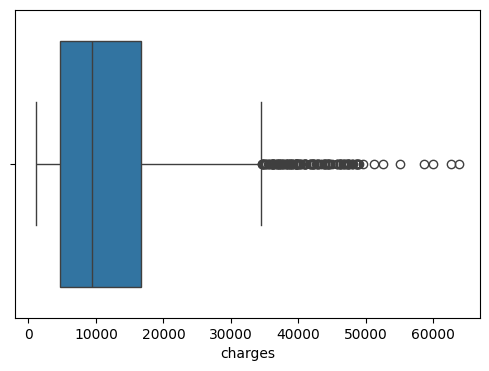

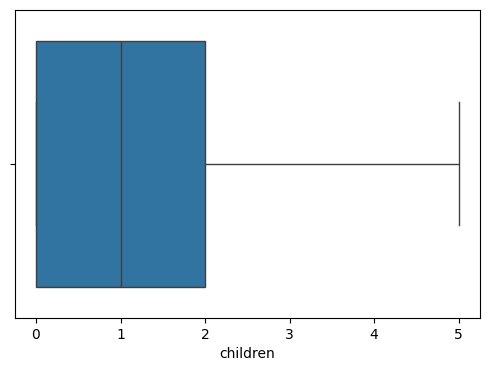

In [33]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

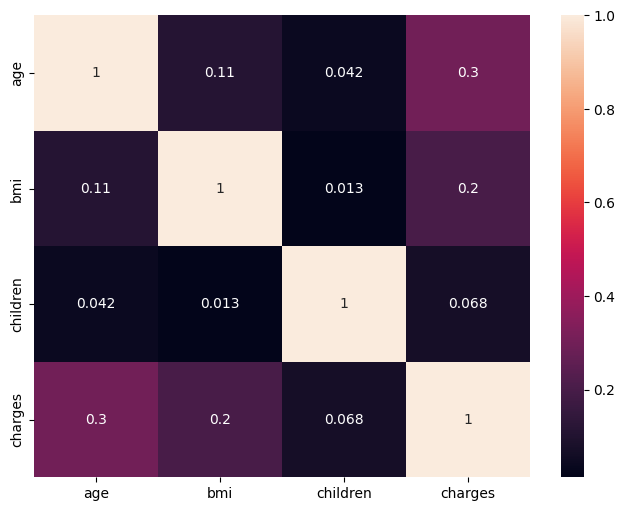

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [35]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)
print(df_cleaned["sex"].value_counts())
df_cleaned["sex"] = df_cleaned["sex"].map({"male":0,"female":1})

print(df_cleaned["sex"].value_counts())

print(df_cleaned["smoker"].value_counts())

df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1,"no":0})
print(df_cleaned["smoker"].value_counts())

df_cleaned.rename(columns={
    'sex' :'is_female',
    'smoker': 'is_smoker'
            },inplace = True)

sex
male      675
female    662
Name: count, dtype: int64
sex
0    675
1    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
smoker
0    1063
1     274
Name: count, dtype: int64


In [36]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
print(df_cleaned)

      age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          1  16884.92400   
1      18          0  33.770         1          0   1725.55230   
2      28          0  33.000         3          0   4449.46200   
3      33          0  22.705         0          0  21984.47061   
4      32          0  28.880         0          0   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          0  10600.54830   
1334   18          1  31.920         0          0   2205.98080   
1335   18          1  36.850         0          0   1629.83350   
1336   21          1  25.800         0          0   2007.94500   
1337   61          1  29.070         0          1  29141.36030   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  